<a href="https://colab.research.google.com/github/eeuunnjjiii/kagglestudy/blob/main/Kaggle%20survey/%5B3rd_Kernel%5DPLOTLY_TUTORIAL_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

참고 : PLOTLY TUTORIAL - 1(https://www.kaggle.com/hakkisimsek/plotly-tutorial-1)

# 캐글 데이터 연동

In [1]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"eunjijeong","key":"29fdf1c9b4bee7ef56c5520fc84d41dc"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning이 발생하지 않도록 해줍니다.
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d kaggle/kaggle-survey-2017
!unzip kaggle-survey-2017.zip

  0% 0.00/3.52M [00:00<?, ?B/s]
100% 3.52M/3.52M [00:00<00:00, 58.1MB/s]
Archive:  kaggle-survey-2017.zip
  inflating: RespondentTypeREADME.txt  
  inflating: conversionRates.csv     
  inflating: freeformResponses.csv   
  inflating: multipleChoiceResponses.csv  
  inflating: schema.csv              


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings('ignore')

from subprocess import check_output
print(check_output(["ls", "../content"]).decode("utf8"))
mcr = pd.read_csv('multipleChoiceResponses.csv',encoding='ISO-8859-1')
mcr.head()

conversionRates.csv
freeformResponses.csv
kaggle.json
kaggle-survey-2017.zip
multipleChoiceResponses.csv
RespondentTypeREADME.txt
sample_data
schema.csv



,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,PublicDatasetsSelect,LearningPlatformSelect,LearningPlatformUsefulnessArxiv,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessCollege,LearningPlatformUsefulnessCompany,LearningPlatformUsefulnessConferences,LearningPlatformUsefulnessFriends,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessNewsletters,LearningPlatformUsefulnessCommunities,LearningPlatformUsefulnessDocumentation,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessPodcasts,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessTradeBook,LearningPlatformUsefulnessTutoring,LearningPlatformUsefulnessYouTube,BlogsPodcastsNewslettersSelect,LearningDataScienceTime,JobSkillImportanceBigData,JobSkillImportanceDegree,JobSkillImportanceStats,JobSkillImportanceEnterpriseTools,...,WorkChallengeFrequencyITCoordination,WorkChallengeFrequencyHiringFunds,WorkChallengeFrequencyPrivacy,WorkChallengeFrequencyScaling,WorkChallengeFrequencyEnvironments,WorkChallengeFrequencyClarity,WorkChallengeFrequencyDataAccess,WorkChallengeFrequencyOtherSelect,WorkDataVisualizations,WorkInternalVsExternalTools,WorkMLTeamSeatSelect,WorkDatasets,WorkDatasetsChallenge,WorkDataStorage,WorkDataSharing,WorkDataSourcing,WorkCodeSharing,RemoteWork,CompensationAmount,CompensationCurrency,SalaryChange,JobSatisfaction,JobSearchResource,JobHuntTime,JobFactorLearning,JobFactorSalary,JobFactorOffice,JobFactorLanguages,JobFactorCommute,JobFactorManagement,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,Employed by a company that doesn't perform adv...,SAS Base,Random Forests,F#,Dataset aggregator/platform (i.e. Socrata/Kagg...,"College/University,Conferences,Podcasts,Trade ...",NaN,NaN,NaN,NaN,Very useful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very useful,NaN,NaN,Somewhat useful,NaN,NaN,"Becoming a Data Scientist Podcast,Data Machina...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Often,Most of the time,NaN,NaN,NaN,NaN,26-50% of projects,Do not know,Standalone Team,NaN,NaN,Document-oriented (e.g. MongoDB/Elasticsearch)...,"Company Developed Platform,I don't typically s...",NaN,"Mercurial,Subversion,Other",Always,NaN,NaN,I am not currently employed,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,Random Forests,Python,Dataset aggregator/platform (i.e. Socrata/Kagg...,Kaggle,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Becoming a Data Scientist Podcast,Siraj Raval ...",1-2 years,NaN,Nice to have,Unnecessary,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amazon Web services,Deep learning,R,Dataset aggregator/platform (i.e. Socrata/Kagg...,"Arxiv,College/University,Kaggle,Online courses...",Very useful,NaN,Somewhat useful,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,Very useful,NaN,NaN,NaN,NaN,NaN,NaN,Very useful,"FastML Blog,No Free Hunch Blog,Talking Machine...",1-2 years,Necessary,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Asking friends, family members, or former coll...",1-2,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Impor

In [27]:
# colab plotly
import plotly.io as pio
pio.renderers.default = 'colab'

# The tech world seems still a man's world

In [28]:
colors = ['aqua', 'lightgrey', 'lightgreen', '#D0F9B1', 'khaki', 'grey']
mcr['GenderSelect'] = np.where(mcr['GenderSelect'] == "Non-binary, genderqueer, or gender non-conforming",'Non-binary',
                             mcr['GenderSelect'])
gender = mcr['GenderSelect'].value_counts()
label = gender.index
size = gender.values

trace = go.Pie(labels=label,
               values=size,
               marker=dict(colors=colors))
data = [trace]
layout = go.Layout(title='Gender Distribution')

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

# Country

In [30]:
df = pd.DataFrame(mcr['Country'].value_counts())
df['country'] = df.index
df.columns = ['number', 'country']
df = df.reset_index().drop('index', axis=1)

data = [dict(
        type = 'choropleth',
        locations = df['country'],
        locationmode = 'country names',
        z = df['number'],
        text = df['country'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],
                      [0.5,"rgb(70, 100, 245)"],
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],
                      [1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) 
        ),
        colorbar = dict(
            autotick = False,
            tickprefix = '$',
            title = 'Survey Respondents')
)
       ]
layout = dict(
    title = 'The Nationality of Respondents',
    geo = dict(
        showframe = False,
        showcoastlines = True,
        projection = dict(
            type = 'Mercator')
    )
)

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False)


# AGE

In [32]:
mcr = mcr[(mcr['Age'] < 75) & (mcr['Age'] > 18)]
age = round(mcr['Age'].value_counts(normalize=True), 4)
trace = go.Bar(
    x=age.index,
    y=age.values,
    marker=dict(color = age.values,
                colorscale='Reds',
                showscale=True)
)

data = [trace]
layout = go.Layout(title='Age distribution',
                   yaxis = dict(title='# of Respondents')
                   )
fig = go.Figure(data=data, layout=layout)
fig['layout']['xaxis'].update(dict(title='Age',
                                   tickfont=dict(size=12)))
py.iplot(fig)

# We can say that online courses (MOOC) are mainstream training platforms of data science.

In [33]:
train = mcr['FirstTrainingSelect'].value_counts()
label = train.index
size = train.values
colors = ['aqua', 'lightgrey', 'lightgreen', '#D0F9B1', 'khaki', 'grey']

trace = go.Pie(labels=label, 
               values=size, 
               marker=dict(colors=colors)
              )

data = [trace]
layout = go.Layout(title='First Training Platform',
                   legend=dict(orientation="h")
                  )

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [39]:
course = mcr['CoursePlatformSelect'].str.split(',')
course_set = []

for i in course.dropna():
  course_set.extend(i)
courses = round(pd.Series(course_set).value_counts(normalize=True)[:5], 4).sort_values(ascending=False).to_frame()
trace1 = go.Bar(
    x=courses.index,
    y=courses[0],
    name='course',
    marker=dict(
        color=courses[0],
        colorscale = "Jet"))

learning = mcr['LearningPlatformSelect'].str.split(',')
learning_set = []
for i in learning.dropna():
    learning_set.extend(i)
learn = round(pd.Series(learning_set).value_counts(normalize=True)[:5], 4).\
        sort_values(ascending = False).to_frame()  
trace2 = go.Bar(
    x=learn.index,
    y=learn[0],
    name='platform',
    marker=dict(
        color=learn[0],
        colorscale = "Jet")
)

fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('Course Platforms', 
                                                          'Learning Platforms'))
fig.append_trace(trace1, 1,1)
fig.append_trace(trace2, 1,2)
fig['layout'].update(height=500, width=820, 
                     title='Where to start & How to continue in DS?', 
                     showlegend=False)                        
py.iplot(fig)

#Basic laptop is enough to follow data science trends so hardware requirements is no excuse not to discover the world.

In [40]:
hardware = mcr['HardwarePersonalProjectsSelect'].str.split(',')
hardware_set = []
for i in hardware.dropna():
    hardware_set.extend(i)
    hware = pd.Series(hardware_set).value_counts()[:6] 
    
label = hware.index
size = hware.values

colors = ['#FEBFB3', 'skyblue', '#96D38C', '#D0F9B1', 'tan', 'lightgrey']

trace = go.Pie(labels=label, 
               values=size, 
               marker=dict(colors=colors)
              )

data = [trace]
layout = go.Layout(
    title='Hardware Requirements', 
    legend=dict(orientation="h")
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

# Salary

In [41]:
mcr['CompensationAmount'] = mcr['CompensationAmount'].str.replace(',','')
mcr['CompensationAmount'] = mcr['CompensationAmount'].str.replace('-','')

salary = mcr[['CompensationAmount','CompensationCurrency','Country','JobSatisfaction',
            'CurrentJobTitleSelect', 'Age','GenderSelect']].dropna()

crates = pd.read_csv('conversionRates.csv')
crates.drop('Unnamed: 0', axis=1,inplace=True)
salary = salary.merge(crates, left_on='CompensationCurrency', right_on='originCountry', how='left')
salary['Salary'] = pd.to_numeric(salary['CompensationAmount'])*salary['exchangeRate']

us_salary = salary[(salary['Salary'] > 100) & (salary['Salary'] < 500000) & 
                   (salary['Country'] == 'United States')]
non_us_salary = salary[(salary['Salary'] > 100) & (salary['Salary'] < 500000) & 
                       (~(salary['Country'] == 'United States'))]
sal_coun = salary.groupby('Country')['Salary'].median().round(-2).sort_values(ascending=False)[:16].\
                                    to_frame()

trace = go.Bar(
    x=sal_coun.index,
    y=sal_coun.Salary,
    marker=dict(
        color=sal_coun.Salary,
        colorscale = 'Reds')
)

data = [trace]
layout = go.Layout(
    title ='Top Countries with Highest Median Salaries', 
    yaxis = dict(title = 'Salary ($)')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [44]:
us_group = us_salary.groupby('Age')['Salary'].median().to_frame()
non_us_group = non_us_salary.groupby('Age')['Salary'].median().to_frame()

trace0 = go.Scatter(
    x = us_group.index,
    y = us_group['Salary'].round(-2),
    name = 'US',
    mode = 'markers',
    marker = dict(size=9,
                  color=('aqua')))

trace1 = go.Scatter(
    x = non_us_group.index,
    y = non_us_group['Salary'].round(-2),
    name = 'non-US',
    mode='markers',
    marker=dict(
        size=9,
        color = ('navy')))

data = [trace0, trace1]
layout = dict(title = 'The Median Salary by Age in US and Non-US Countries',
              xaxis = dict(title = 'Age'),
              yaxis = dict(title = 'Salary ($)')
             )

fig = dict(data=data, layout=layout)
fig['layout']['xaxis'].update(dict(title = 'Age', tickfont = dict(size = 12)))
py.iplot(fig)

# Correlation does not imply causation but it seems that satisfaction and salary go hand in hand.

In [45]:
salary['JobSatisfaction'].replace({'10 - Highly Satisfied':'10','1 - Highly Dissatisfied':'0'
                                    ,'I prefer not to share':np.NaN},inplace=True)

salary.dropna(subset=['JobSatisfaction'], inplace=True)
salary['JobSatisfaction']=salary['JobSatisfaction'].astype(int)

In [46]:
salary_us = salary[salary.originCountry=='USD'].groupby('JobSatisfaction').Salary.mean().to_frame()
salary_non_us = salary[salary.originCountry!='USD'].groupby('JobSatisfaction').Salary.mean().to_frame()

trace0 = go.Scatter(
    x=salary_us.index,
    y=salary_us['Salary'].round(-2),
    name = 'US',
    mode='markers',
    marker=dict(size=11,
        color=('navy')
               )
)

trace1 = go.Scatter(
      x = salary_non_us.index,
    y = salary_non_us['Salary'].round(-2),
    name = 'non_US',
    mode='markers',
    marker=dict(size=11,
        color = ('aqua')
               )
)
data = [trace0, trace1]
layout = dict(title = 'The Median Salary & Satisfaction in US & non-US Countries',
              xaxis = dict(title = 'Job Satisfaction'),
              yaxis = dict(title = 'Salary ($)')
             )

fig = dict(data=data, layout=layout)
fig['layout']['xaxis'].update(dict(title = 'Job Satisfaction', 
                                   tickmode='linear',
                                   tickfont = dict(size = 10)))
py.iplot(fig)

#Let's combine age, job satisfaction and salary!

In [48]:
salary = salary[salary.Salary<1000000]
dat = salary[['Age', 'JobSatisfaction', 'Salary']]
dat['index'] = np.arange(len(dat))
fig = ff.create_scatterplotmatrix(dat, diag='box', index='index',
                                  colormap_type='cat', colormap='Jet',
                                  height=800, width=800)
py.iplot(fig)

# It seems that there is no gender inequality in terms of salary in data science world.

In [50]:
male_salary = salary[salary['GenderSelect'] == 'Male']
female_salary = salary[salary['GenderSelect'] == 'Female']
male = male_salary.groupby('Age').Salary.mean().to_frame()
female = female_salary.groupby('Age').Salary.mean().to_frame()

trace0 = go.Scatter(
    x = male.index,
    y = male['Salary'].round(-2),
    name = 'male',
    line = dict(
        color = 'aqua',
        width = 2,
        dash='dash')
)

trace1 = go.Scatter(
      x = female.index,
    y = female['Salary'].round(-2),
    name = 'female',
    line = dict(
        color = 'navy',
        width = 2,
        dash = 'dash')
    )

data = [trace0, trace1]
layout = dict(title = 'The Median Salary of Men & Women by Age',
              xaxis = dict(title = 'Age'),
              yaxis = dict(title = 'Salary ($)')
             )

fig = dict(data=data, layout=layout)
fig['layout']['xaxis'].update(dict(title = 'Age', 
                                   tickfont = dict(size = 12)))
py.iplot(fig)

#But wait! After 60, there is something weird it could change all the picture. Maybe gender-gap?? Let's check box-plot!

In [53]:
trace0 = go.Box(x=male_salary.Salary, name='Male', fillcolor='navy')
trace1 = go.Box(x=female_salary.Salary, name='Female', fillcolor='lime')
data = [trace0, trace1]
py.iplot(data)

Yes, we are right to being suspicious. Median wage of male is higher than median wage of female.

#Let's investigate gender inequality in US vs. Non-US.

In [54]:
male_us_salary = salary[(salary['GenderSelect'] == 'Male') & 
                        (salary.originCountry=='USD')]
male_non_us_salary = salary[(salary['GenderSelect'] == 'Male')& 
                        (salary.originCountry!='USD')]
female_us_salary = salary[(salary['GenderSelect'] == 'Female')& 
                        (salary.originCountry=='USD')]
female_non_us_salary = salary[(salary['GenderSelect'] == 'Female')& 
                        (salary.originCountry!='USD')]
male_us = male_us_salary.groupby('Age').Salary.mean().to_frame()
male_nus = male_non_us_salary.groupby('Age').Salary.mean().to_frame()
female_us = female_us_salary.groupby('Age').Salary.mean().to_frame()
female_nus = female_non_us_salary.groupby('Age').Salary.mean().to_frame()

trace0 = go.Scatter(
    x = male_us.index,
    y = male_us['Salary'].round(-2),
    name = 'male',
    mode='markers',
    marker=dict(
        size=8,
        color = ('grey')
    )
)
trace1 = go.Scatter(
      x = female_us.index,
    y = female_us['Salary'].round(-2),
    name = 'female',
    mode='markers',
    marker=dict(
        size=8,
        color = ('red')
    )
)

data = [trace0, trace1]
layout = dict(title = 'The Median Salary of Men & Women by Age in US',
              xaxis = dict(title = 'Age'),
              yaxis = dict(title = 'Salary ($)')
             )

fig = dict(data=data, layout=layout)
fig['layout']['xaxis'].update(dict(title = 'Age', 
                                   tickfont = dict(size = 12)))
py.iplot(fig)

trace0 = go.Scatter(
    x = male_nus.index,
    y = male_nus['Salary'].round(-2),
    name = 'male',
    mode='markers',
    marker=dict(
        size=8,
        color = ('grey')
    )
)
trace1 = go.Scatter(
      x = female_nus.index,
    y = female_nus['Salary'].round(-2),
    name = 'female',
    mode='markers',
    marker=dict(
        size=8,
        color = ('red')
    )
)

data = [trace0, trace1]
layout = dict(title = 'The Median Salary of Men & Women by Age in non-US countries',
              xaxis = dict(title = 'Age'),
              yaxis = dict(title = 'Salary ($)')
             )

fig = dict(data=data, layout=layout)
fig['layout']['xaxis'].update(dict(title = 'Age', 
                                   tickfont = dict(size = 12)))
py.iplot(fig)

It seems that women are underpaid after 35 and they are out of labor force especially after their 50s in non-US countries!!

#Majors & titles
As expected, computer science, mathematics, statistics and engineering are leading degree majors in data science.

In [55]:
mcr = mcr[~(mcr['MajorSelect'] == 'Other')]
mcr['MajorSelect'].replace({'Information technology, networking, or system administration':'IT, Network, System Admin', 
                      'Mathematics or statistics':'Math or stats',
                      'Engineering (non-computer focused)':'Engineering (non-CS)',
                      'IT, Network, System Admin':'IT-Network-System'}, inplace=True)

ms = round(mcr.MajorSelect.value_counts(normalize=True).to_frame()[:8], 4)
trace1 = go.Bar(
    x=ms.index,
    y=ms.MajorSelect,
    marker=dict(color='orange')
)

mcr['CurrentJobTitleSelect'].replace({'Software Developer/Software Engineer':'Software Developer', 
                      'Machine Learning Engineer':'ML Engineer'}, inplace=True)
cs = round(mcr.CurrentJobTitleSelect.value_counts(normalize=True).to_frame()[:8], 4)
trace2 = go.Bar(
    x=cs.index,
    y=cs.CurrentJobTitleSelect,
    marker=dict(color='navy')
)

fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('Majors', 'Titles'))
fig.append_trace(trace1, 1,1)
fig.append_trace(trace2, 1,2)
fig['layout'].update(height=500, width=820, title='Majors & Titles in Data Science World', 
                     showlegend=False)            
py.iplot(fig)

In [56]:
def PieChart(column, title, limit):
    male = mcr[mcr['GenderSelect'] == 'Male']
    female = mcr[mcr['GenderSelect'] == 'Female']
    count_male = male[column].value_counts()[:limit].reset_index()
    count_female = female[column].value_counts()[:limit].reset_index()
    color = ['red',  'navy',  'cyan', 'lightgrey','orange', 'gold','lightgreen', 
                            '#D0F9B1','tomato', 'tan']
    
    trace1 = go.Pie(labels=count_male['index'], 
                    values=count_male[column], 
                    name= "male", 
                    hole= .5, 
                    domain= {'x': [0, .48]},
                   marker=dict(colors=color))

    trace2 = go.Pie(labels=count_female['index'], 
                    values=count_female[column], 
                    name="female", 
                    hole= .5,  
                    domain= {'x': [.52, 1]})
    layout = dict(title= title, font=dict(size=15), legend=dict(orientation="h"),
                  annotations = [
                      dict(
                          x=.20, y=.5,
                          text='Male', 
                          showarrow=False,
                          font=dict(size=20)
                      ),
                      dict(
                          x=.81, y=.5,
                          text='Female', 
                          showarrow=False,
                          font=dict(size=20)
                      )
        ])

    fig = dict(data=[trace1, trace2], layout=layout)
    py.iplot(fig)


In [57]:
PieChart('MajorSelect','Undergraduate Major', 6)

In [58]:
PieChart('CurrentJobTitleSelect', "Job Title", 6)

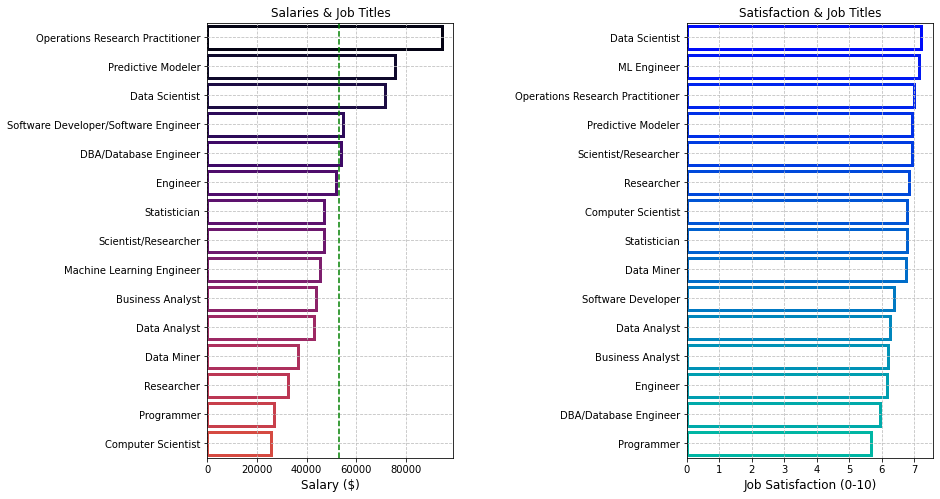

In [59]:
salary = salary[~(salary['CurrentJobTitleSelect'] == 'Other')]
mcr = mcr[~(mcr['CurrentJobTitleSelect'] == 'Other')]

f,ax=plt.subplots(1,2,figsize=(13, 8))
sal_job=salary.groupby('CurrentJobTitleSelect')['Salary'].median().to_frame().sort_values(by='Salary'
                                                         ,ascending=False)
sns.barplot(sal_job.Salary,sal_job.index,facecolor=(0, 0, 0, 0), linewidth=3, 
              edgecolor=sns.color_palette("inferno", 25), ax = ax[0])

ax[0].set_title("Salaries & Job Titles", fontsize=12)
ax[0].set_xlabel('Salary ($)', fontsize=12)
ax[0].set_ylabel('')
ax[0].axvline(salary['Salary'].median(),linestyle='dashed', color = "g")
ax[0].grid(color = 'silver',linestyle='--')

satisfy=mcr.copy()
satisfy['JobSatisfaction'].replace({'10 - Highly Satisfied':'10','1 - Highly Dissatisfied':'0'
                                    ,'I prefer not to share':np.NaN},inplace=True)
satisfy.dropna(subset=['JobSatisfaction'], inplace=True)
satisfy['JobSatisfaction']=satisfy['JobSatisfaction'].astype(int)
satisfy_job=satisfy.groupby(['CurrentJobTitleSelect'])['JobSatisfaction'].mean().sort_values(ascending=False).to_frame()
sns.barplot(y=satisfy_job.index, x=satisfy_job.JobSatisfaction,facecolor=(0, 0, 0, 0), linewidth=3, 
              edgecolor=sns.color_palette("winter", 20), ax = ax[1])

ax[1].set_title("Satisfaction & Job Titles", fontsize=12)
ax[1].set_xlabel('Job Satisfaction (0-10)', fontsize =12)
ax[1].set_ylabel('')
ax[1].grid(color = 'silver',linestyle='--')
plt.subplots_adjust(wspace=0.95)
plt.show()

#Although experiences of most respondents in coding are lower than 5 years, employment rate is quite high.

In [60]:
mcr['EmploymentStatus']=np.where(mcr['EmploymentStatus'] =='Independent contractor, freelancer, or self-employed',
                                                'Independent', mcr['EmploymentStatus'])
emp = mcr['EmploymentStatus'].value_counts().head(6)
labels = emp.index
sizes = emp.values

trace = go.Pie(labels=labels, 
               values=sizes, 
               marker=dict(colors=colors), 
               textposition = "inside")

data = [trace]
layout = go.Layout(
    title='Employment Status')

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

tenure = mcr['Tenure'].value_counts()[:5].sort_values(ascending = False).to_frame()  

trace = go.Bar(
    x=tenure.index,
    y=tenure.Tenure,
    marker=dict(
            color=tenure.Tenure.values,
        colorscale = 'Jet',
        reversescale = True))

data = [trace]
layout = go.Layout(title='Experience in Coding', yaxis = dict(title = '# of Respondents'))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

#Social capital is probably the most important thing in the professional world regardless of sectors.

In [61]:
search = mcr['EmployerSearchMethod'].value_counts()
label = search.index
size = search.values

trace = go.Pie(labels=label, 
               values=size, 
               marker=dict(colors=colors),
               textposition = "outside")

data = [trace]
layout = go.Layout(
    title='Job Search Method', 
    legend=dict(orientation="h"))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

#Experience

In [62]:
educ = round(mcr['FormalEducation'].value_counts(normalize=True)[:5], 4).\
            sort_values(ascending = False).to_frame()  
as_list = educ.index.tolist()
idx = as_list.index("Some college/university study without earning a bachelor's degree")
as_list[idx] = 'University w/o degree'
educ.index = as_list

trace = go.Bar(
    x=educ.index,
    y=educ.FormalEducation,
    marker=dict(
        color=educ.FormalEducation.values,
        colorscale = 'Jet',
        reversescale = True))

data = [trace]
layout = go.Layout(
    title='Education Status', 
    yaxis = dict(title = '# of Respondents'))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="Edu")

PieChart('FormalEducation', "Education", 5)

proof = mcr['ProveKnowledgeSelect'].value_counts()
labels = proof.index
sizes= proof.values

trace = go.Pie(labels=labels, 
               values=sizes, 
               marker=dict(colors=colors), 
               textposition = "inside")

data = [trace]
layout = go.Layout(
    title='Proof of Knowledge')

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

#It is critical to learn logistic regression, random forests and support vector machine. To learn math behind these algorithms to narrate non-technical audiences is more critical.

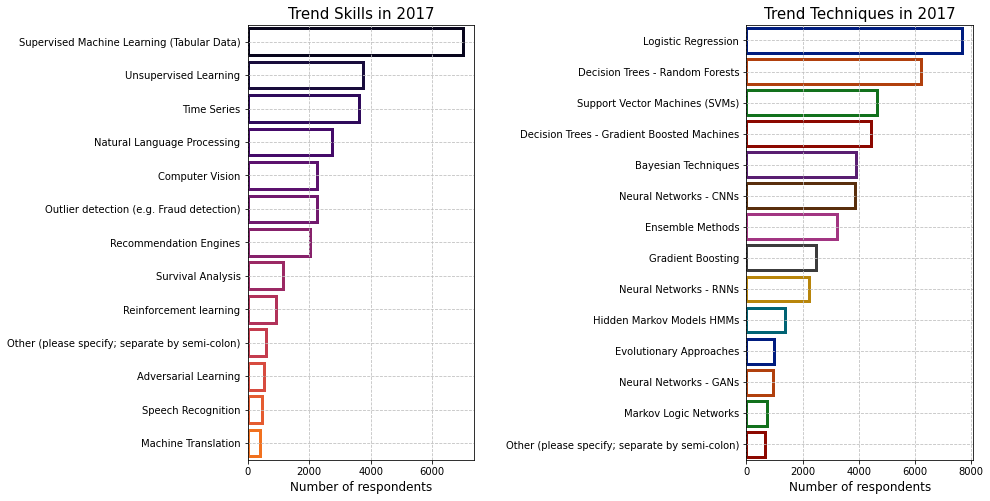

In [63]:
f,ax = plt.subplots(1,2,figsize=(13, 8))

skills = mcr['MLSkillsSelect'].str.split(',')
skills_set = []
for i in skills.dropna():
    skills_set.extend(i)
skill = pd.Series(skills_set).value_counts().sort_values(ascending = False)[:15].to_frame()  

sns.barplot(skill[0], skill.index,facecolor=(0, 0, 0, 0), linewidth=3, 
              edgecolor=sns.color_palette("inferno", 18), ax = ax[0])

ax[0].set_title("Trend Skills in 2017", fontsize=15)
ax[0].set_xlabel('Number of respondents', fontsize=12)
ax[0].grid(color = 'silver',linestyle='--')

tool = mcr['MLTechniquesSelect'].str.split(',')
tool_set = []
for i in tool.dropna():
    tool_set.extend(i)
tool = pd.Series(tool_set).value_counts().sort_values(ascending = False)[:15].to_frame()  

sns.barplot(tool[0], tool.index,facecolor=(0, 0, 0, 0), linewidth=3, 
              edgecolor=sns.color_palette("dark", 18), ax = ax[1])

ax[1].set_title("Trend Techniques in 2017", fontsize=15)
ax[1].set_xlabel('Number of respondents', fontsize=12)
ax[1].grid(color = 'silver',linestyle='--')
plt.subplots_adjust(wspace=1.2)
plt.show()

#2018 will be the year of Deep Learning!

In [64]:
next_skills = mcr['MLMethodNextYearSelect'].str.split(',')
next_skills_set = []
for i in next_skills.dropna():
    next_skills_set.extend(i)
next_skill = pd.Series(next_skills_set).value_counts()[:8] 

label = (np.array(next_skill.index))
size = next_skill.values

trace = go.Pie(labels=label, 
               values=size, 
               marker=dict(colors=colors))

data = [trace]
layout = go.Layout(
    title='Trend Methods in 2018')

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [65]:
next_tool = mcr['MLToolNextYearSelect'].str.split(',')
next_tool_set = []
for i in next_tool.dropna():
    next_tool_set.extend(i)
next_tool = pd.Series(next_tool_set).value_counts()[:12]

label = (np.array(next_tool.index))
size = next_tool.values

trace = go.Pie(labels=label, 
               values=size, 
               marker=dict(colors=colors))

data = [trace]
layout = go.Layout(
    title='Trend Tools in 2018')

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

#When you need to find data Kaggle, Socrata helps, when you need to share codes, git helps.

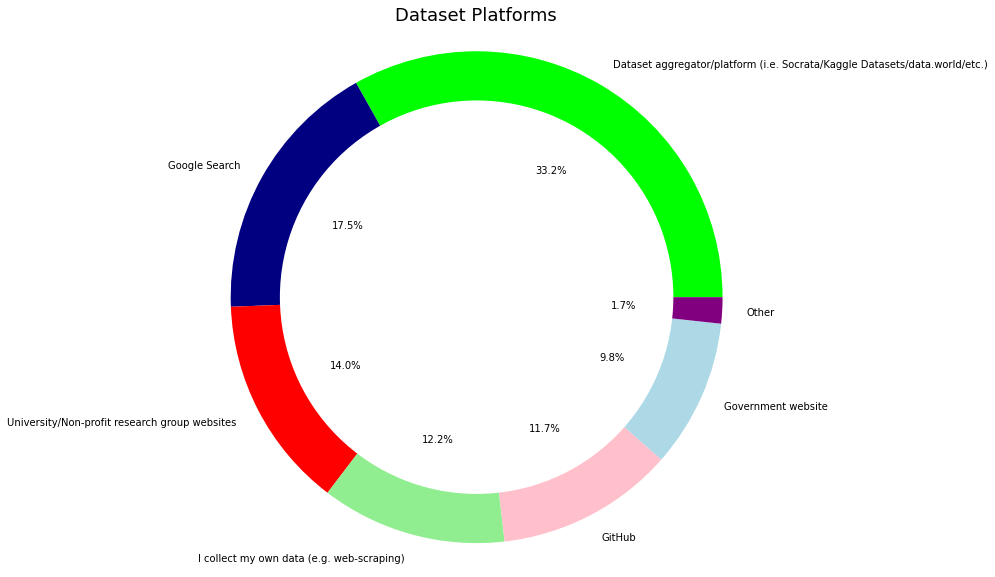

In [66]:
plt.figure(figsize=(14,10))

data = mcr['PublicDatasetsSelect'].str.split(',')
data_set = []
for i in data.dropna():
    data_set.extend(i)
data = pd.Series(data_set).value_counts().sort_values(ascending = False)[:15].to_frame()  

colors2 = ['lime', 'navy', 'red', 'lightgreen', 'pink', 'lightblue', 'purple']
plt.pie(data[0], labels=data.index, shadow = False, autopct='%1.1f%%', colors = colors2)     
centre_circle = plt.Circle((0,0),0.80, fc='white' ,linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.title('Dataset Platforms', fontsize =18)
plt.show()

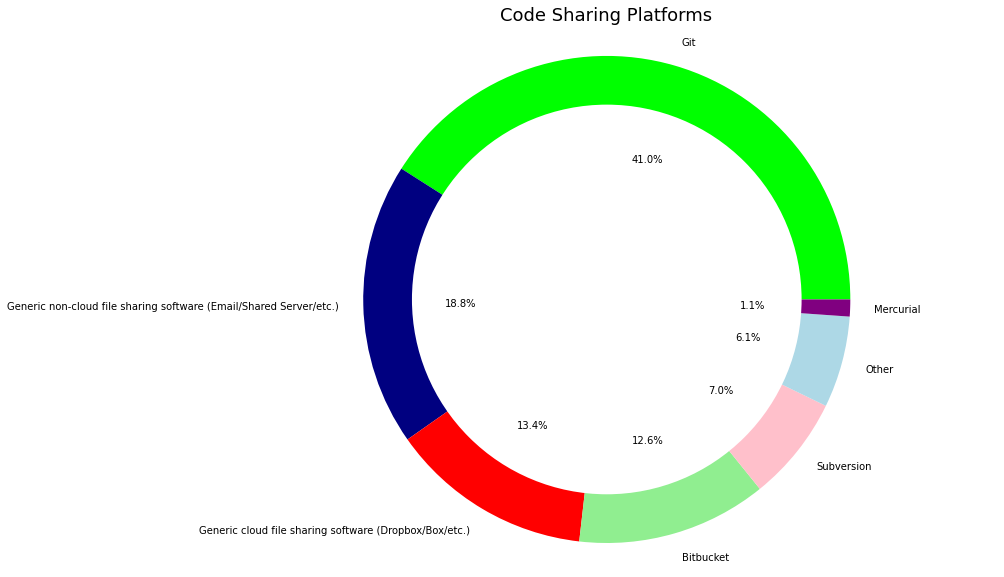

In [67]:
plt.figure(figsize=(14, 10))

code = mcr['WorkCodeSharing'].str.split(',')
code_set = []
for i in code.dropna():
    code_set.extend(i)
code = pd.Series(code_set).value_counts().sort_values(ascending = False)[:15].to_frame()  

colors2 = ['lime', 'navy', 'red', 'lightgreen', 'pink', 'lightblue', 'purple']
plt.pie(code[0], labels=code.index, shadow = False, autopct='%1.1f%%', colors=colors2)     
centre_circle = plt.Circle((0,0),0.80, fc='white' ,linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.title('Code Sharing Platforms', fontsize = 18)
plt.show()

#we should spend our most time (%60-%70) to clean the data, not to build cool algorithms and models.

In [68]:
challenge = mcr['WorkChallengesSelect'].str.split(',')
challenge_set = []

for i in challenge.dropna():
    challenge_set.extend(i)
challenges = pd.Series(challenge_set).value_counts()[:5]

label = (np.array(challenges.index))
size = challenges.values

trace = go.Pie(labels=label, 
               values=size, 
               marker=dict(colors=colors))

data = [trace]
layout = go.Layout(
    title='Challenges in Data Science', 
    legend=dict(orientation="h"))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

# R vs Python

In [69]:
mcr=mcr.dropna(subset=['WorkToolsSelect'])
Python=mcr[(mcr['WorkToolsSelect'].str.contains('Python'))&(~mcr['WorkToolsSelect'].str.contains('R'))]
R=mcr[(~mcr['WorkToolsSelect'].str.contains('Python'))&(mcr['WorkToolsSelect'].str.contains('R'))]

colors = ['cyan', 'gold', 'bisque', '#D0F9B1', 'tan', 'lightgrey', 'lightblue', 'lightgreen', 'c', 
          'wheat', 'tomato', 'y', 'cyan', 'bisque', 'tan']

py_major = Python['MajorSelect'].value_counts()[:8]
label = (np.array(py_major.index))
size = py_major.values
trace1 = go.Pie(labels=label, values=size, name='Python',marker=dict(colors=colors),domain  = dict(x = [0,.48]),hole = .2)

r_major = R['MajorSelect'].value_counts()[:8]
label = (np.array(r_major.index))
size = r_major.values
trace2 = go.Pie(labels=label, values=size, name='R',marker=dict(colors=colors),domain  = dict(x = [0.52,1]),hole = .2)

data = [trace1,trace2]
layout = go.Layout(
        title='Majors of Respondents',annotations = [dict(text = "Python Users",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .18, y = 1.1),
                                           dict(text = "R Users",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .8,y = 1.1
                                               )
                                                    ]
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [70]:
py_ind = Python['CurrentJobTitleSelect'].value_counts()[:12]
f_py = py_ind.to_frame()
as_list = f_py.index.tolist()
idx = as_list.index('ML Engineer')
as_list[idx] = 'ML Engineer'
f_py.index = as_list

trace = go.Bar(
    x=f_py.index,
    y=f_py.CurrentJobTitleSelect,
    marker=dict(
        color=f_py.CurrentJobTitleSelect,
        colorscale = 'Jet',
        reversescale = True)
)

data = [trace]
layout = go.Layout(
    title='Job Titles of Python Users', yaxis = dict(title = '# of Respondents')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [71]:
R_ind = R['CurrentJobTitleSelect'].value_counts()[:12]
f_r = R_ind.to_frame()
as_list = f_r.index.tolist()
f_r.index = as_list

trace = go.Bar(
    x=f_r.index,
    y=f_r.CurrentJobTitleSelect,
    marker=dict(
        color=f_r.CurrentJobTitleSelect,
        colorscale = 'Viridis',
        reversescale = True))

data = [trace]
layout = go.Layout(
    title='Job Titles of R Users', yaxis = dict(title = '# of Respondents')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [74]:
Py_ind = Python['EmployerIndustry'].value_counts()[:12]

trace = go.Scatter(
    x=Py_ind.index,
    y=Py_ind.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 40,
        color = Py_ind.values,
        colorscale='Portland',
        showscale=True)
)

data = [trace]
layout = go.Layout(
    title='Industries of Python users', yaxis = dict(title = '# of Respondents')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [75]:
R_ind = R['EmployerIndustry'].value_counts()[:12]

trace = go.Scatter(
    x=R_ind.index,
    y=R_ind.values,
    mode='markers',
    marker=dict(
        symbol = 'triangle-up',
        sizemode = 'diameter',
        sizeref = 1,
        size = 50,
        color = R_ind.values,
        colorscale='Portland',
        showscale=True)
)

data = [trace]
layout = go.Layout(
    title='Industries of R users', yaxis = dict(title = '# of Respondents')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [76]:
data = Python['WorkDataTypeSelect'].str.split(',')
data_set = []
for i in data.dropna():
    data_set.extend(i)
r_datas = pd.Series(data_set).value_counts()[:10].sort_values(ascending = False).to_frame()  

trace = go.Bar(
    x=r_datas.index,
    y=r_datas[0].values,
    marker=dict(
        color=r_datas[0],
        colorscale = [[0, 'rgb(166,206,227)'], [0.25, 'rgb(31,120,180)'], 
                      [0.45, 'rgb(178,223,138)'], 
                      [0.65, 'rgb(51,160,44)'], [0.85, 'rgb(251,154,153)'], 
                      [1, 'rgb(227,26,28)']],
        reversescale = True))

data = [trace]
layout = go.Layout(
    title='Data Types Frequently Used by Python Users', 
    yaxis = dict(title = '# of Respondents')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)


In [77]:
data = R['WorkDataTypeSelect'].str.split(',')
data_set = []
for i in data.dropna():
    data_set.extend(i)
py_datas = pd.Series(data_set).value_counts()[:10].sort_values(ascending = False).to_frame()  

trace = go.Bar(
    x=py_datas.index,
    y=py_datas[0].values,
    marker=dict(
        color=py_datas[0],
        colorscale = 'Jet',
        reversescale = True)
)

data = [trace]
layout = go.Layout(
    title='Data Types Frequently Used by R Users', 
    yaxis = dict(title = '# of Respondents')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

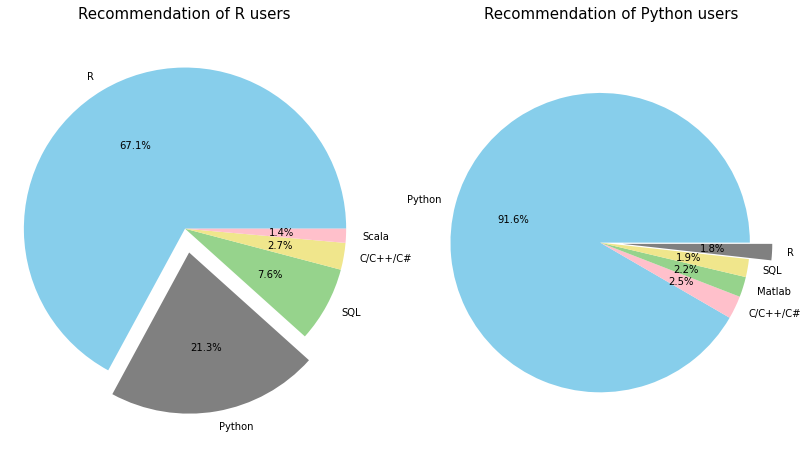

In [78]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))

colors2 = ['skyblue', 'grey', '#96D38C', 'khaki', 'pink']
temp=R['LanguageRecommendationSelect'].value_counts()[:5]
labels = temp.index
sizes = temp.values

ax1.pie(sizes, labels=labels, shadow = False, autopct='%1.1f%%', 
        explode=(0, 0.15, 0, 0, 0), 
        colors = colors2)
ax1.axis('equal')
ax1.set_title('Recommendation of R users', fontsize = 15)

colors2 = ['skyblue', 'pink', '#96D38C', 'khaki', 'grey']
temp=Python['LanguageRecommendationSelect'].value_counts()[:5]
labels = temp.index
sizes = temp.values

ax2.pie(sizes, labels=labels, shadow = False, autopct='%1.1f%%', 
        explode=(0, 0,0,0,0.15),
        colors = colors2)
ax2.axis('equal')
ax2.set_title('Recommendation of Python users', fontsize = 15)
plt.show()

#If you decide which language you start with, these are most frequently used tools by respondents at work.

In [79]:
data = Python['WorkToolsSelect'].str.split(',')
data_set = []
for i in data.dropna():
    data_set.extend(i)
datas = pd.Series(data_set).value_counts()[1:10].sort_values(ascending = False).to_frame()  

trace = go.Bar(
    x=datas.index,
    y=datas[0].values,
    marker=dict(
        color=datas[0],
        colorscale = 'Jet',
        reversescale = True)
)

data = [trace]
layout = go.Layout(
    title='Tools of Python Users at Work', yaxis = dict(title = '# of Respondents')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [80]:
data = R['WorkToolsSelect'].str.split(',')
data_set = []
for i in data.dropna():
    data_set.extend(i)
datas = pd.Series(data_set).value_counts()[1:10].sort_values(ascending = False).to_frame()  

as_list = datas.index.tolist()
idx = as_list.index('Microsoft Excel Data Mining')
as_list[idx] = 'Excel Data Mining'
datas.index = as_list

trace = go.Bar(
    x=datas.index,
    y=datas[0].values,
    marker=dict(
        color=datas[0],
        colorscale = 'Jet',
        reversescale = True)
)

data = [trace]
layout = go.Layout(
    title='Tools of R Users at Work', yaxis = dict(title = '# of Respondents')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)